In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_excel("C:\\Users\\rcmlp.12\\Desktop\\pirep delay\\EFG-E75_delay_piprep_data.xlsx")

In [4]:
df.head()

,New_ata_code,MONTH_CODE,Pirep,Inte
0,23,201801,33,5
1,23,201802,47,9
2,23,201803,59,10
3,23,201804,61,17
4,23,201805,41,7


In [5]:
X=df.drop("Inte",axis=1)
y=df["Inte"]

In [41]:
X

,New_ata_code,MONTH_CODE,Pirep
0,23,201801,33
1,23,201802,47
2,23,201803,59
3,23,201804,61
4,23,201805,41
...,...,...,...
235,52,202108,77
236,52,202109,63
237,52,202110,58
238,52,202111,54


In [42]:
y

0       5
1       9
2      10
3      17
4       7
       ..
235    28
236    29
237    14
238    12
239    23
Name: Inte, Length: 240, dtype: int64

In [6]:
print("Shape of X=",X.shape)
print("Shape of y=",y.shape)

Shape of X= (240, 3)
Shape of y= (240,)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=51)

In [9]:
print("Shape of X_train=",X_train.shape)
print("Shape of X_test=",X_test.shape)
print("Shape of y_train=",y_train.shape)
print("Shape of y_test=",y_test.shape)

Shape of X_train= (192, 3)
Shape of X_test= (48, 3)
Shape of y_train= (192,)
Shape of y_test= (48,)


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [12]:
sc.fit(X_train)


StandardScaler()

In [13]:
X_train=sc.transform(X_train)

In [14]:
X_test=sc.transform(X_test)

In [15]:
from sklearn.svm import SVR

In [16]:
svr_rbf=SVR(kernel='rbf')

In [17]:
svr_rbf.fit(X_train,y_train)

SVR()

In [18]:
import matplotlib.pyplot as plt

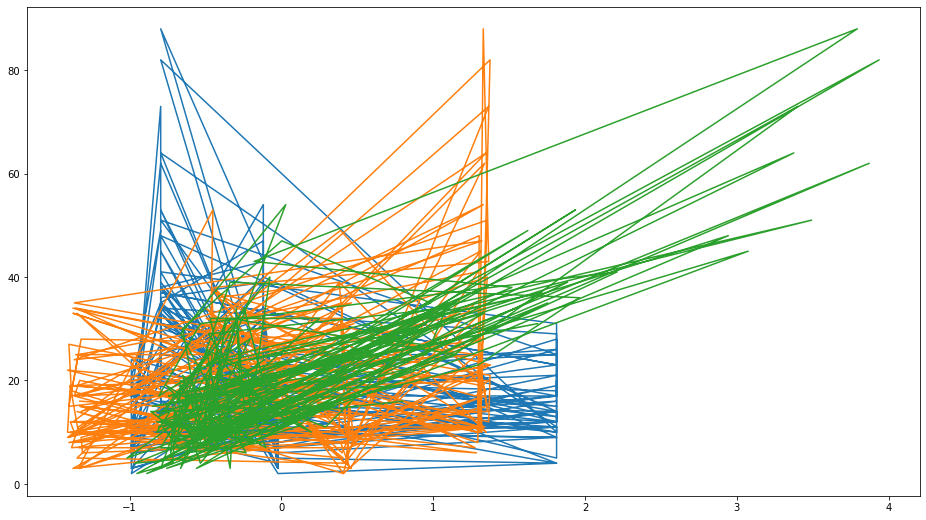

In [19]:
plt.figure(figsize=(16,9))
plt.plot(X_train,y_train)


Text(0, 0.5, 'Interruption')

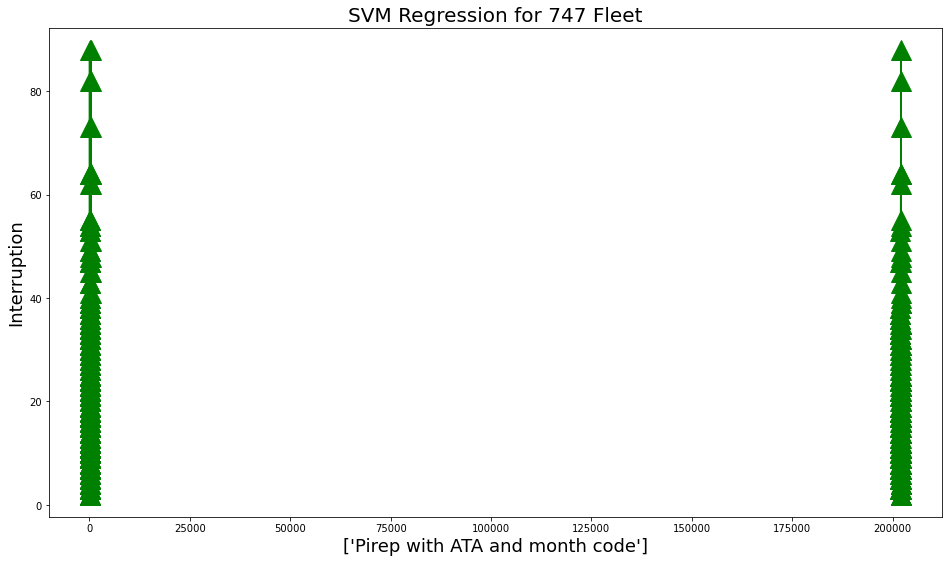

In [20]:
plt.figure(figsize=(16,9))
plt.plot(X,y, color = "g", marker = "^",markersize=20)
plt.title("SVM Regression for 747 Fleet", fontsize=20)
plt.xlabel("['Pirep with ATA and month code']",fontsize=18)
plt.ylabel("Interruption",fontsize=18)



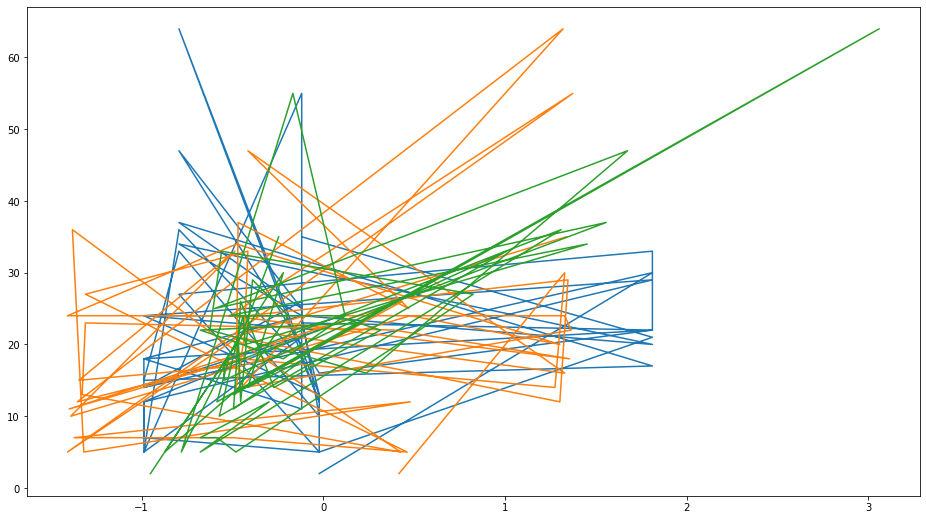

In [21]:
plt.figure(figsize=(16,9))
plt.plot(X_test,y_test)


In [22]:
svr_rbf.score(X_test,y_test)

0.2733633438368904

In [23]:
svr_linear=SVR(kernel='linear')

In [24]:
svr_linear.fit(X_train,y_train)

SVR(kernel='linear')

In [25]:
svr_linear.score(X_test,y_test)

0.4510008160828577

In [26]:
svr_poly2=SVR(kernel='poly',degree=2)

In [27]:
svr_poly2.fit(X_train,y_train)

SVR(degree=2, kernel='poly')

In [28]:
svr_poly2.score(X_test,y_test)

0.277524604260721

In [29]:
svr_poly3=SVR(kernel='poly',degree=3)

In [30]:
svr_poly3.fit(X_train,y_train)

SVR(kernel='poly')

In [31]:
svr_poly3.score(X_test,y_test)

0.4497465389407801

In [32]:
X_test[0]

array([-0.11919685,  1.33823953, -0.24625523])

In [33]:
svr_poly3.predict(X_test)

array([17.09513523, 18.84658202, 15.09304077, 12.84035431, 15.76082469,
       13.92316244, 16.24063785, 16.40554739, 17.58584183,  8.04536968,
       16.12042918, 15.02617046, 16.59663454, 14.75964312, 16.09365606,
       52.13077397, 12.40855678, 16.15682687, 32.607844  ,  9.37873224,
       14.86911258,  8.91166411, 13.82265081, 15.99799815, 23.35163803,
       17.65800491, 16.9039486 , 19.07019899, 30.30447927, 15.85760811,
       28.83345835, 17.8497952 ,  9.83845976, 21.85163687, 12.17728224,
       16.10478111, 15.79192108, 27.29151747, 12.14150913, 17.43156147,
       19.55045278, 14.54420767, 16.11878551, 12.30056194, 14.99570976,
       15.16174592, 20.02795118, 14.83660381])

In [34]:
y_predict_poly2_svr=svr_poly2.predict(X_test)

In [35]:
y_predict_poly2_svr

array([14.49726816, 13.97169151, 17.38955   , 13.68713579, 14.60029609,
       17.50697872, 12.34204317, 14.2276734 , 14.24761235,  9.61437047,
       14.2194871 , 12.38409246, 14.28018507, 11.94154229, 14.49488675,
       52.19942785, 13.79490416, 14.38549606, 27.04863055,  9.87504466,
       12.03784099,  9.80119853, 10.98827745, 15.20810366, 20.31960191,
       15.21044074, 15.96548608, 13.60141412, 30.76603396, 15.48854063,
       28.98580759, 14.99909078, 10.11064565, 21.402406  , 13.72593696,
       14.85079389, 14.78531394, 27.38383244, 13.37341515, 12.82600893,
       13.57242766, 11.666906  , 14.86820704, 13.35864746, 12.2991868 ,
       12.33565145, 12.13852225, 17.95473016])

In [36]:
y_predict_linear_svr=svr_linear.predict(X_test)

In [37]:
y_predict_linear_svr

array([14.74832566, 16.95232205,  7.42887387, 11.57240337, 19.87399579,
       14.41553251, 12.85355598, 18.88026381, 15.6846978 ,  5.847485  ,
       11.8943544 , 10.05076213, 17.94619416, 12.95563055, 11.82681632,
       52.33515635, 10.637085  , 11.27818514, 31.19874575,  7.10089872,
       11.81813041,  7.09457616,  8.28536124, 12.09387438, 25.45887374,
       15.71892976, 14.94002466, 20.74086246, 35.66261826, 10.45140403,
       34.25806006, 15.86691296,  8.6513326 , 27.73085287, 10.78822948,
       12.31677198, 17.47484682, 33.01413017, 11.16227155, 16.26830405,
       21.67723459, 12.02136594, 12.15614366, 11.47404434, 14.03893213,
       10.5136794 , 19.96376035,  6.49566301])

In [38]:
y_test

139    35
206    21
173     5
153    13
107    23
217    22
45     18
108    24
143    55
0       5
113    21
39     12
236    29
23     24
159    13
89     64
150    12
118    18
51     36
10      5
35     12
4       7
14      7
177     5
59     27
215    33
213    22
186    16
71     47
130    25
65     37
208    17
7      15
63     33
146    10
131    24
231    20
64     34
96     24
42     24
190    22
21     14
126    26
97     11
19     18
36     14
234    30
172     2
Name: Inte, dtype: int64

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
mse=mean_squared_error(y_test,y_predict)

NameError: name 'y_predict' is not defined

In [ ]:
rmse=np.sqrt(mse)

In [ ]:
print("MSE=",mse)

In [ ]:
print("RMSE=",rmse)